In [1]:
from radiomics import featureextractor
import radiomics
import scipy
import trimesh
import pandas as pd

In [211]:
Patient_Information_all_Finial=pd.read_excel('./Patient_Information_all_Finial.xlsx')

# import pandas as pd
PatientImage=pd.read_excel('./PatientImage_Cleaned.xlsx')

In [20]:
PatientImage_Radiomic=pd.read_excel('./PatientImage_Radiomic_1.xlsx')

In [21]:
import re
for i in PatientImage_Radiomic.columns:
    if re.search('shape',i,re.I)!=None:
        print i

original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxis
original_shape_MajorAxis
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_Maximum3DDiameter
original_shape_MinorAxis
original_shape_Sphericity
original_shape_SurfaceArea
original_shape_SurfaceVolumeRatio
original_shape_Volume


In [22]:
Patient_Information_all_Finial.columns

Index([u'MRN', u'PatientID', u'Age', u'Gender', u'PG', u'PPath',
       u'Primary_grade', u'RG', u'RPath', u'Recurrent_grade',
       u'Recurrent_pathlogy_change', u'GFAP', u'Ki67', u'P53', u'MGMT',
       u'Olig2', u'IDH1', u'EMA', u'NeuN', u'GFAP_R', u'Ki67_R', u'P53_R',
       u'MGMT_R', u'Olig2_R', u'IDH1_R', u'EMA_R', u'NeuN_R',
       u'First_operating_day', u'Recurrent-detecting_day', u'P_Side',
       u'P_Lobe_E', u'R_Side', u'R_Lobe_E', u'Radiation', u'Chemotherapy',
       u'TimePoint1_T1', u'TimePoint1_T1C', u'TimePoint1_T2', u'TimePoint2_T1',
       u'TimePoint2_T1C', u'TimePoint2_T2', u'P_Lobe', u'R_Lobe'],
      dtype='object')

In [25]:
Patient_LowLow=Patient_Information_all_Finial[(Patient_Information_all_Finial.Primary_grade=='Low')&(Patient_Information_all_Finial.Recurrent_grade=='Low')]

In [26]:
Patient_LowHigh=Patient_Information_all_Finial[(Patient_Information_all_Finial.Primary_grade=='Low')&(Patient_Information_all_Finial.Recurrent_grade=='High')]

In [31]:
len(Patient_LowHigh),len(Patient_LowLow),len(Patient_LowHigh[Patient_LowHigh.PatientID.isin(PatientImage_Radiomic.PatientID)]),len(Patient_LowLow[Patient_LowLow.PatientID.isin(PatientImage_Radiomic.PatientID)])

(86, 60, 12, 13)

# Relation withChange of grade
### Clinical Feature
### Radiomic feature  

# Plot the data

## Age

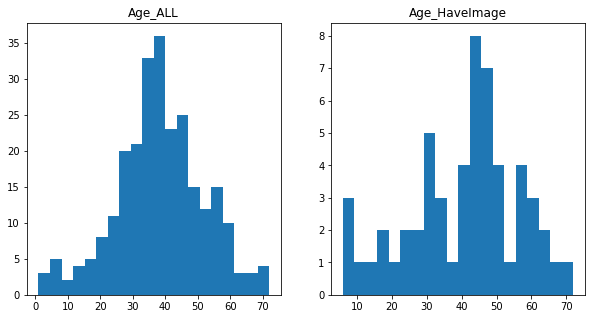

In [43]:
fig = plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax1.hist(Patient_Information_all_Finial.Age,bins=20)
ax1.set_title('Age_ALL')
ax2=fig.add_subplot(1,2,2)
ax2.hist(Patient_Information_all_Finial[Patient_Information_all_Finial.PatientID.isin(PatientImage_Radiomic.PatientID)].Age,bins=20)
ax2.set_title('Age_HaveImage')
plt.show()

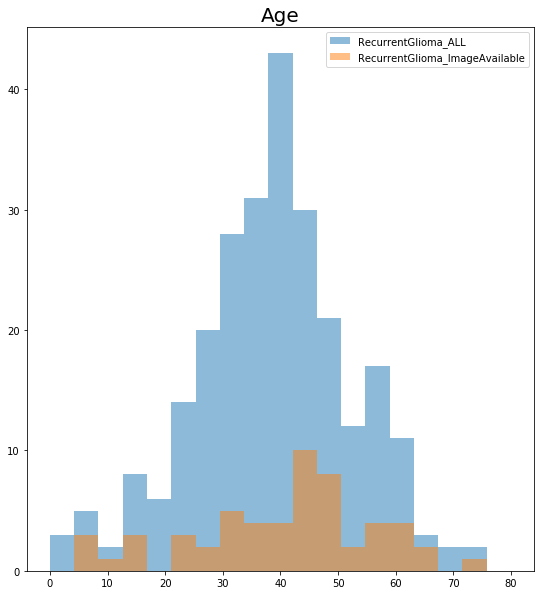

In [90]:
from matplotlib import pyplot
import numpy as np
fig = pyplot.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
RecurrentGlioma_ALL = Patient_Information_all_Finial.Age
RecurrentGlioma_ImageAvailable = Patient_Information_all_Finial[Patient_Information_all_Finial.PatientID.isin(PatientImage_Radiomic.PatientID)].Age

bins = np.linspace(0, 80, 20)

ax1.hist(RecurrentGlioma_ALL, bins, alpha=0.5, label='RecurrentGlioma_ALL')
ax1.hist(RecurrentGlioma_ImageAvailable, bins, alpha=0.5, label='RecurrentGlioma_ImageAvailable')
ax1.legend(loc='upper right')
ax1.set_title('Age',fontsize=20)
pyplot.show()

##  Gender

In [225]:
Patient_Information_all_Finial.loc[Patient_Information_all_Finial.PatientID.isin(PatientImage_Radiomic.PatientID),'BrainMRIAvailable']='Yes'
Patient_Information_all_Finial.loc[~Patient_Information_all_Finial.PatientID.isin(PatientImage_Radiomic.PatientID),'BrainMRIAvailable']='No'


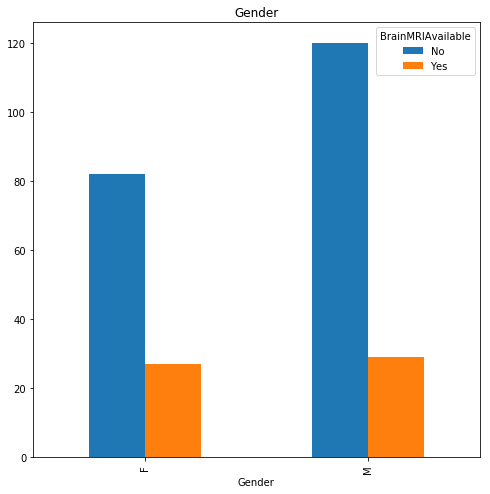

In [108]:
import matplotlib.pyplot as plt
GenderCount=pd.crosstab(index=Patient_Information_all_Finial.Gender,columns=Patient_Information_all_Finial.BrainMRIAvailable)
GenderCount.plot(kind="bar",
                 figsize=(8,8),
                 title='Gender')

plt.show()

In [103]:
GenderCount

BrainMRIAvailable,No,Yes
Gender,,
F,82,27
M,120,29


# Pathology charactor

In [212]:
set(Patient_Information_all_Finial.RPath),set(Patient_Information_all_Finial.PPath)

({0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13})

In [213]:
Patient_Information_all_Finial.loc[Patient_Information_all_Finial.RPath.isin([20,14]),'RPath']=None

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.RPath.isin([4,7]),'RPath']=4

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.PPath.isin([4,7]),'PPath']=4

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.RPath.isin([2,6]),'RPath']=2

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.PPath.isin([2,6]),'PPath']=2

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.PPath.isin([9,12]),'PPath']=9

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.RPath.isin([9,12]),'RPath']=9

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.PPath.isin([3,16]),'PPath']=3

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.RPath.isin([3,16]),'RPath']=3

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.PPath.isin([10,17,18]),'PPath']=10

Patient_Information_all_Finial.loc[Patient_Information_all_Finial.RPath.isin([10,17,18]),'RPath']=10

In [220]:
PathName=pd.read_excel('./PathName.xlsx',header=None)

PathName.columns=['Chinese','Old_Group','New_Group','English']

PathName

,Chinese,Old_Group,New_Group,English
0,伽马刀治疗,14,NaN,NaN
1,室管膜,0,0.0,Ependymoma
2,少突胶质细胞,1,1.0,Oligodendroglioma
3,星形胶质母细胞,2,2.0,Glioblastoma
4,胶质母细胞,6,2.0,Glioblastoma
5,星形细胞胶质,16,3.0,Astrocytoma
6,星形胶质细胞,3,3.0,Astrocytoma
7,毛细胞型星形细胞,4,4.0,Ganglionoma
8,节细胞胶质,7,4.0,Ganglionoma
9,混合型胶质,5,5.0,Mixed_Gliomas


In [148]:
set(Patient_Information_all_Finial.RG),set(Patient_Information_all_Finial.PG)

({1, 2, 3, 4}, {1, 2, 3, 4})

In [221]:
Patient_Information_all_Finial.rename(index=str,columns={'Primary_grade':'PG_Category','Recurrent_grade':'RG_Category'},inplace=True)

In [222]:
set(Patient_Information_all_Finial.PG_Category),set(Patient_Information_all_Finial.RG_Category)

({u'High', u'Low'}, {u'High', u'Low'})

## 1.Tumor Grade

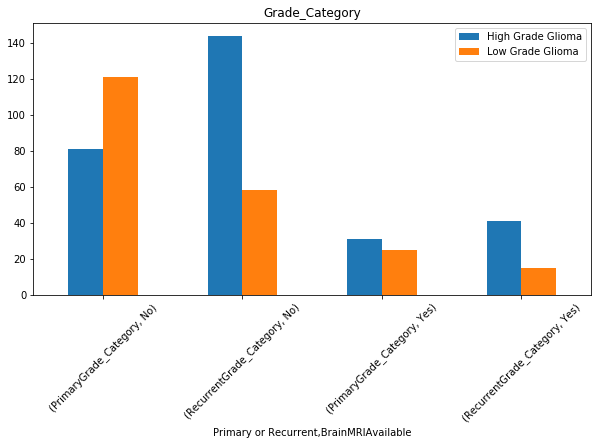

In [325]:
import matplotlib.pyplot as plt
PGCategory_Count=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.PG_Category)
RGCategory_Count=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.RG_Category)
Grade_Category=pd.concat([PGCategory_Count,RGCategory_Count],keys=['PrimaryGrade_Category','RecurrentGrade_Category']).sort_index(level=1, axis=0)
Grade_Category.index.names=['Primary or Recurrent', u'BrainMRIAvailable']
Grade_Category.columns=['High Grade Glioma','Low Grade Glioma']
Grade_Category.plot(kind="bar",rot=45,
                 figsize=(10,5),
                 title='Grade_Category')

plt.show()



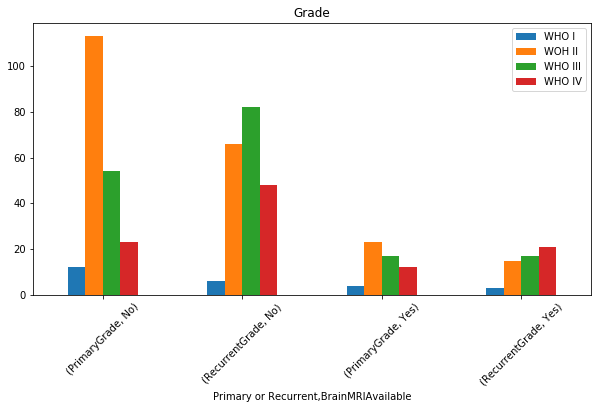

In [324]:
import matplotlib.pyplot as plt
PG_Count=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.PG)
RG_Count=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.RG)
Grade=pd.concat([PG_Count,RG_Count],keys=['PrimaryGrade','RecurrentGrade']).sort_index(level=1, axis=0)
Grade.columns=['WHO I','WOH II','WHO III','WHO IV']
Grade.index.names=['Primary or Recurrent', u'BrainMRIAvailable']
Grade.plot(kind="bar",rot=45,
                 figsize=(10,5),
                 title='Grade')

plt.show()


In [404]:
Grade

,,WHO I,WOH II,WHO III,WHO IV
Primary or Recurrent,BrainMRIAvailable,,,,
PrimaryGrade,No,12,113,54,23
RecurrentGrade,No,6,66,82,48
PrimaryGrade,Yes,4,23,17,12
RecurrentGrade,Yes,3,15,17,21


###  Comment: as there is not enough WHO I so we will focus on II,III,IV

## 2.Pathology

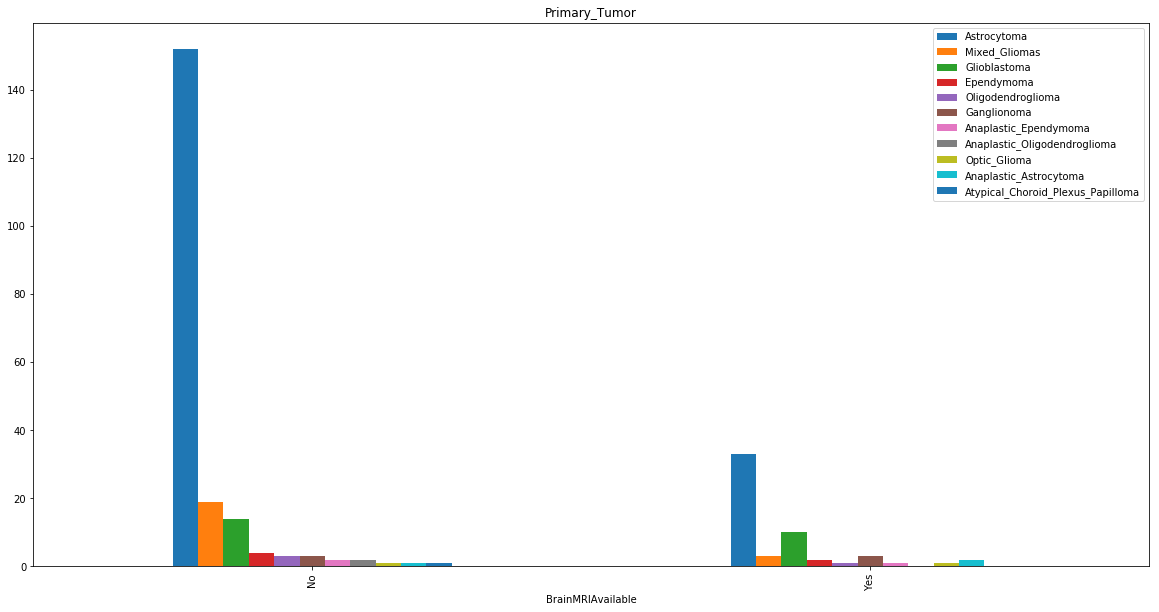

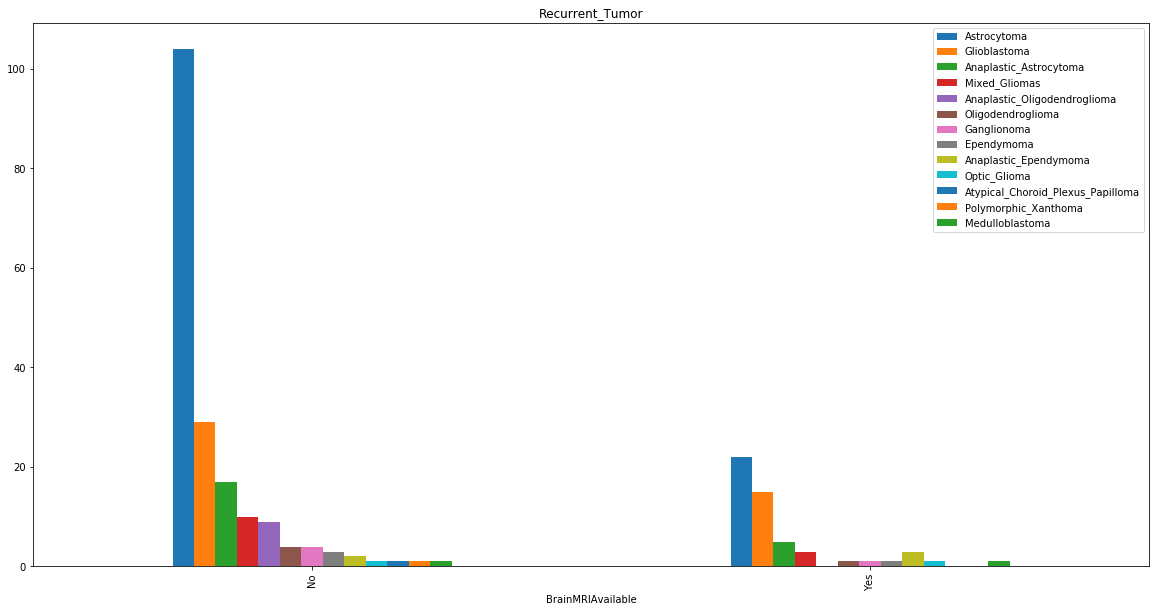

In [406]:
PPathCount=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.PPath)

RPathCount=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.RPath)
# RPathCount

RPathCount_use=RPathCount.T.sort_values('No',ascending=False).T
PPathCount_use=PPathCount.T.sort_values('No',ascending=False).T


New_name=[]
for i in RPathCount_use.columns:
    a=PathName.loc[PathName.Old_Group==i,'English']
#     print list(a)[0]
    New_name.append(list(a)[0])
# New_name

RPathCount_use.columns=New_name
New_name=[]
for i in PPathCount_use.columns:
    a=PathName.loc[PathName.Old_Group==i,'English']
#     print list(a)[0]
    New_name.append(list(a)[0])
# New_name

PPathCount_use.columns=New_name

import matplotlib.pyplot as plt
PPathCount_use.plot(kind="bar",
                 figsize=(20,10),
                 title='Primary_Tumor')

RPathCount_use.plot(kind="bar",
                 figsize=(20,10),
                 title='Recurrent_Tumor')

plt.show()

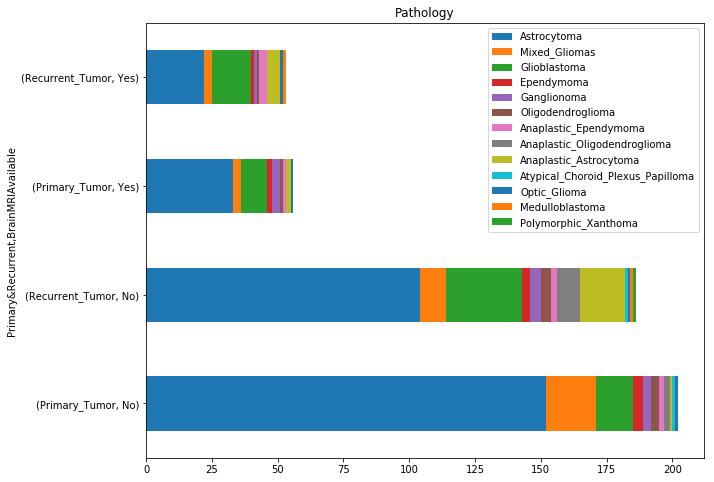

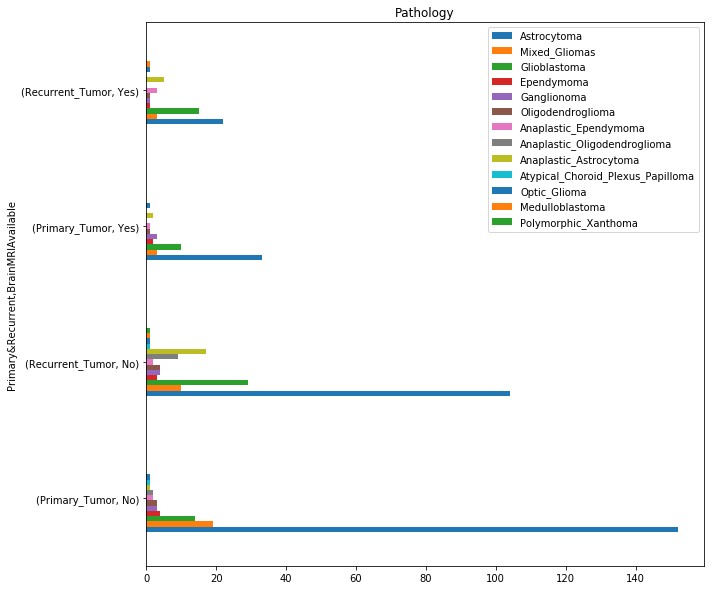

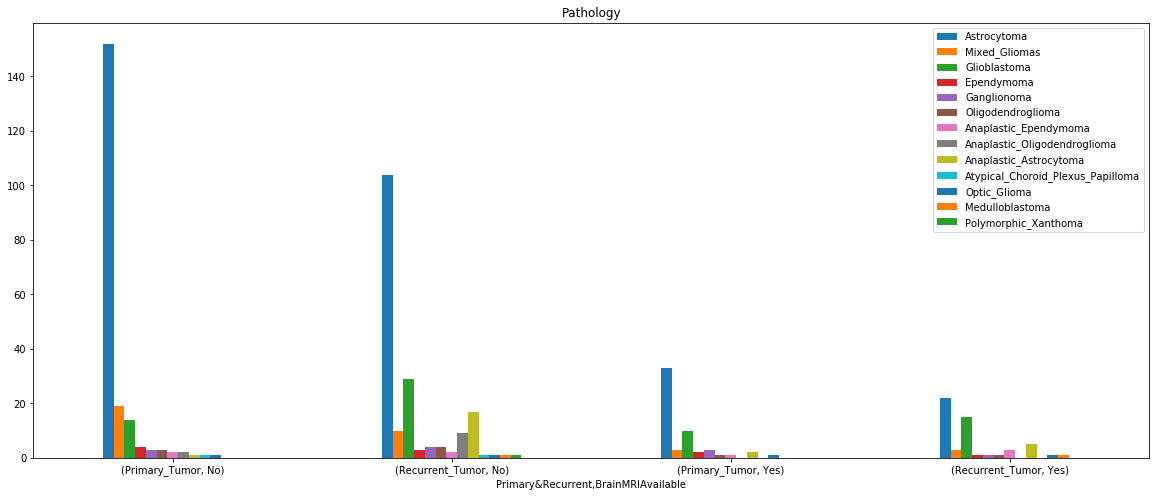

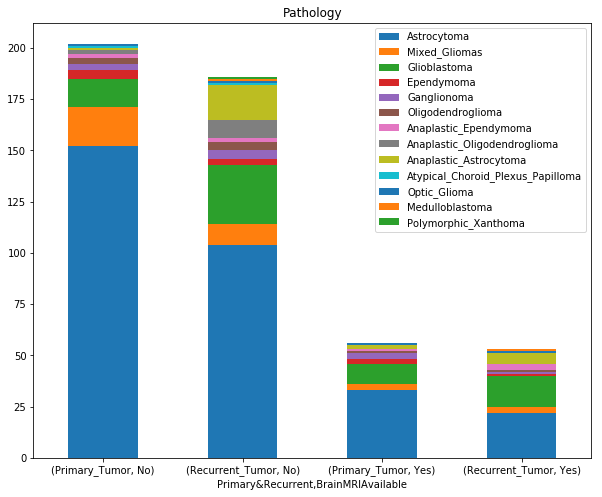

In [283]:
PathALL=pd.concat([PGCount_use,RGCount_use],keys=['Primary_Tumor','Recurrent_Tumor'])
PathALL_use=PathALL.T.sort_values(('Primary_Tumor','No'),ascending=False).T
PathALL_use.index.names=['Primary&Recurrent','BrainMRIAvailable']
PathALL_use1=PathALL_use.sort_index(level=1, axis=0)
import matplotlib.pyplot as plt

PathALL_use1.plot(kind="barh",
                 figsize=(10,8),
                 stacked=True,
                 title='Pathology')
PathALL_use1.plot(kind="barh",
                 figsize=(10,10),
                 title='Pathology')
PathALL_use1.plot(kind="bar",rot=0,
                 figsize=(20,8),
                 title='Pathology')
PathALL_use1.plot(kind="bar",rot=0,
                 figsize=(10,8),
                 stacked=True, 
                 title='Pathology')

plt.show()


In [286]:
PathALL_use1.T

Primary&Recurrent,Primary_Tumor,Recurrent_Tumor,Primary_Tumor,Recurrent_Tumor
BrainMRIAvailable,No,No,Yes,Yes
Astrocytoma,152.0,104.0,33.0,22.0
Mixed_Gliomas,19.0,10.0,3.0,3.0
Glioblastoma,14.0,29.0,10.0,15.0
Ependymoma,4.0,3.0,2.0,1.0
Ganglionoma,3.0,4.0,3.0,1.0
Oligodendroglioma,3.0,4.0,1.0,1.0
Anaplastic_Ependymoma,2.0,2.0,1.0,3.0
Anaplastic_Oligodendroglioma,2.0,9.0,0.0,0.0
Anaplastic_Astrocytoma,1.0,17.0,2.0,5.0


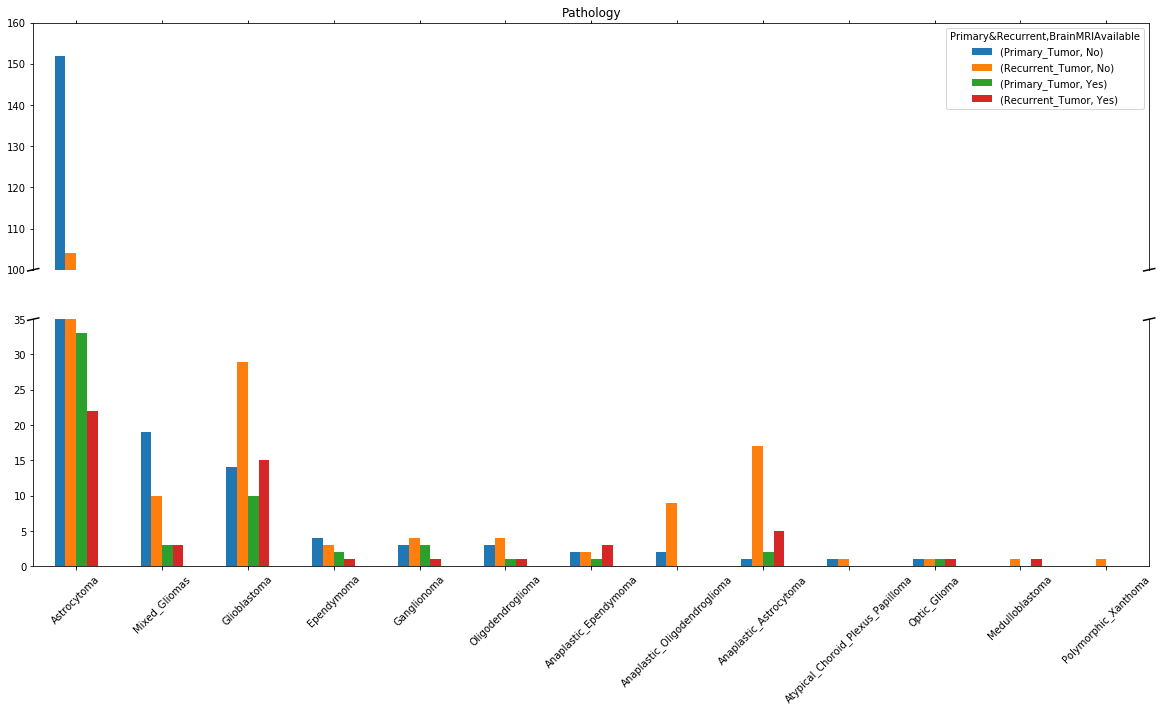

In [306]:
## RAW CODE FROM https://matplotlib.org/examples/pylab_examples/broken_axis.html
# Also thanks dmcdougall and Wouter Overmeire

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
PathALL_use1.T.plot(kind="bar",rot=45,
                   figsize=(20,10),
                   title='Pathology',
                   ax=ax)
PathALL_use1.T.plot(kind="bar",rot=45,
                   figsize=(20,10),
                   ax=ax2)

ax.set_ylim(100, 160)  # outliers only
ax2.set_ylim(0, 35)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.legend().set_visible(False)# remove the legend on the top
ax2.xaxis.tick_bottom()
d = .005
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)
ax.plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)
plt.show()

### as the pathology of our patient with Brian MRI available is clusting under Astrocytoma and Gliobastoma, so we will focus on that two group 

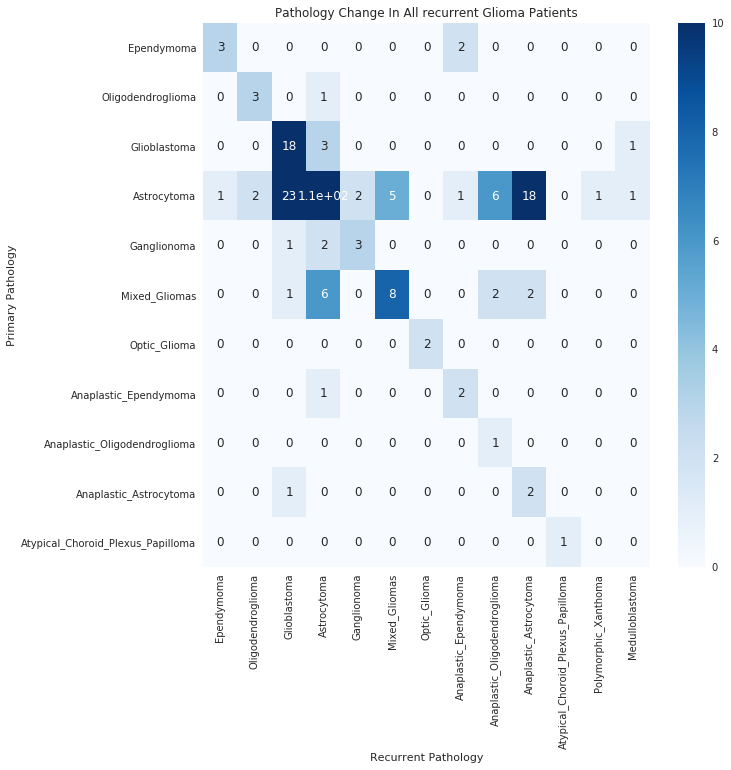

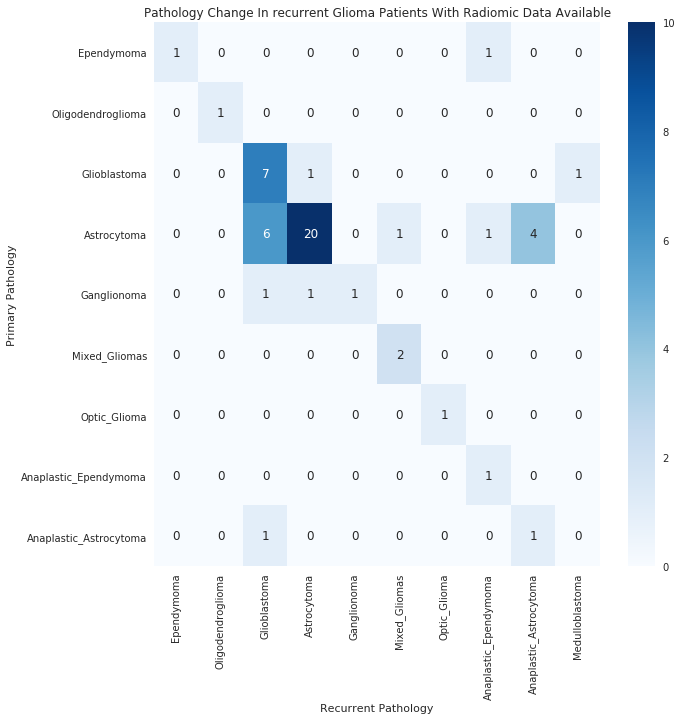

In [538]:
# raw code from https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
# Thank you Brideau
import numpy as np 
from pandas import DataFrame
import seaborn as sns

PathChange=pd.crosstab(Patient_Information_all_Finial.PPath,Patient_Information_all_Finial.RPath)
New_name_x=[]
New_name_y=[]
for x in PathChange.index:
    a=PathName.loc[PathName.Old_Group==x,'English']
    New_name_x.append(list(a)[0])
for y in PathChange.columns:
    b=PathName.loc[PathName.Old_Group==int(y),'English']
#     print list(a)[0]
    New_name_y.append(list(b)[0])
PathChange.index=New_name_x
PathChange.index.name='Primary Pathology'
PathChange.columns=New_name_y
PathChange.columns.name='Recurrent Pathology'
fig,ax=plt.subplots(figsize=(10,10))
sns.set(font_scale=1) # add font 
sns.heatmap(PathChange, annot=True,vmin=0, vmax=10,cmap="Blues",ax=ax)

ax.set_title('Pathology Change In All recurrent Glioma Patients')
fig,ax1=plt.subplots(figsize=(10,10))
PathChange_HaveMRI=pd.crosstab(Patient_Information_all_Finial[Patient_Information_all_Finial.BrainMRIAvailable=='Yes'].PPath,Patient_Information_all_Finial[Patient_Information_all_Finial.BrainMRIAvailable=='Yes'].RPath)
New_name_x=[]
New_name_y=[]
for x in PathChange_HaveMRI.index:
    a=PathName.loc[PathName.Old_Group==x,'English']
    New_name_x.append(list(a)[0])
for y in PathChange_HaveMRI.columns:
    b=PathName.loc[PathName.Old_Group==int(y),'English']
#     print list(a)[0]
    New_name_y.append(list(b)[0])
PathChange_HaveMRI.index=New_name_x
PathChange_HaveMRI.columns=New_name_y
PathChange_HaveMRI.index.name='Primary Pathology'
PathChange_HaveMRI.columns.name='Recurrent Pathology'
sns.heatmap(PathChange_HaveMRI, annot=True,vmin=0, vmax=10,cmap="Blues",ax=ax1)
ax1.set_title('Pathology Change In recurrent Glioma Patients With Radiomic Data Available')

plt.show()

In [539]:
#Pearson's chi-squared test
st=[]
p=[]
for i in PathChange.index:
    
    a= scipy.stats.chisquare(PathChange.loc[i,~PathChange.columns.isin([i])])
    st.append(a.statistic)
    p.append(a.pvalue)

PathChange["Test Statistic"]=st
PathChange['p-value']=p
PathChange['p<0.05']=[i<0.05 for i in PathChange['p-value']]
PathChange

Recurrent Pathology,Ependymoma,Oligodendroglioma,Glioblastoma,Astrocytoma,Ganglionoma,Mixed_Gliomas,Optic_Glioma,Anaplastic_Ependymoma,Anaplastic_Oligodendroglioma,Anaplastic_Astrocytoma,Atypical_Choroid_Plexus_Papilloma,Polymorphic_Xanthoma,Medulloblastoma,Test Statistic,p-value,p<0.05
Primary Pathology,,,,,,,,,,,,,,,,
Ependymoma,3,0,0,0,0,0,0,2,0,0,0,0,0,22.000000,2.437324e-02,True
Oligodendroglioma,0,3,0,1,0,0,0,0,0,0,0,0,0,11.000000,4.432633e-01,False
Glioblastoma,0,0,18,3,0,0,0,0,0,0,0,0,1,26.000000,6.489917e-03,True
Astrocytoma,1,2,23,113,2,5,0,1,6,18,0,1,1,125.200000,1.624550e-21,True
Ganglionoma,0,0,1,2,3,0,0,0,0,0,0,0,0,17.000000,1.078756e-01,False
Mixed_Gliomas,0,0,1,6,0,8,0,0,2,2,0,0,0,38.090909,7.551989e-05,True
Optic_Glioma,0,0,0,0,0,0,2,0,0,0,0,0,0,NaN,NaN,False
Anaplastic_Ependymoma,0,0,0,1,0,0,0,2,0,0,0,0,0,11.000000,4.432633e-01,False
Anaplastic_Oligodendroglioma,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,False


In [540]:
PathChange.to_excel('./PathChange.xlsx')

# Lobe

In [530]:
Patient_Information_all_Finial.loc[Patient_Information_all_Finial.P_Lobe=='Parietal ','P_Lobe']='Parietal'

In [531]:
Patient_Information_all_Finial.loc[Patient_Information_all_Finial.R_Lobe=='Parietal ','R_Lobe']='Parietal'

In [532]:
set(Patient_Information_all_Finial.P_Lobe),set(Patient_Information_all_Finial.R_Lobe)

({u'BrainStem',
  u'Cerebellum',
  u'Frontal',
  u'Insula',
  u'Muti',
  u'Occipital',
  'Parietal',
  u'Temporal',
  u'Ventricle'},
 {u'BrainStem',
  u'Cerebellum',
  u'Frontal',
  u'Insula',
  u'Muti',
  u'Occipital',
  'Parietal',
  u'Temporal',
  u'Ventricle'})

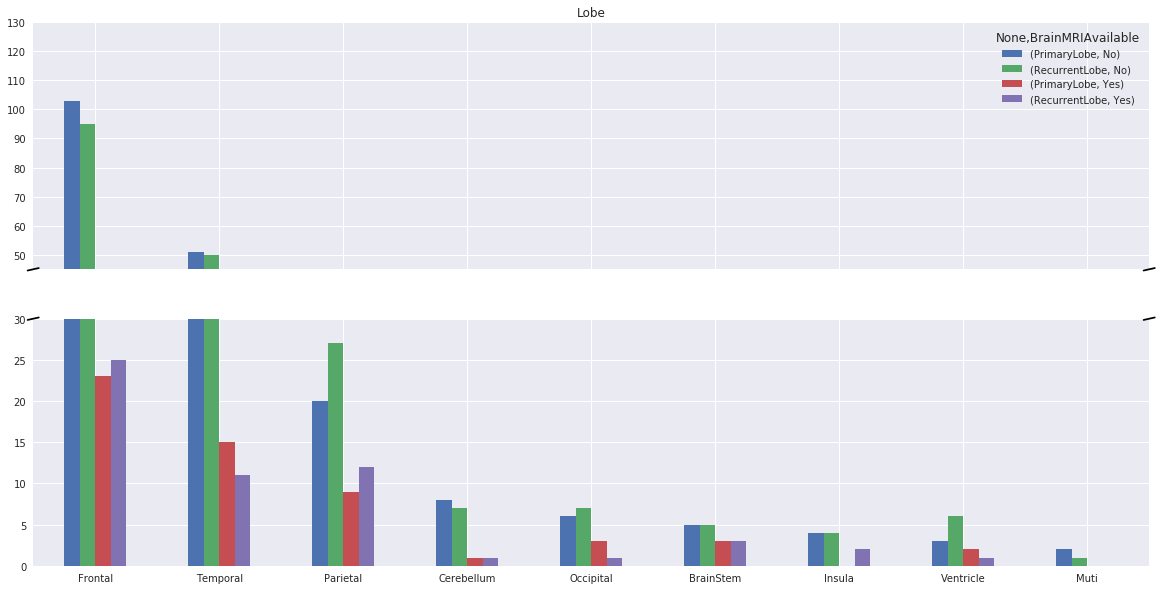

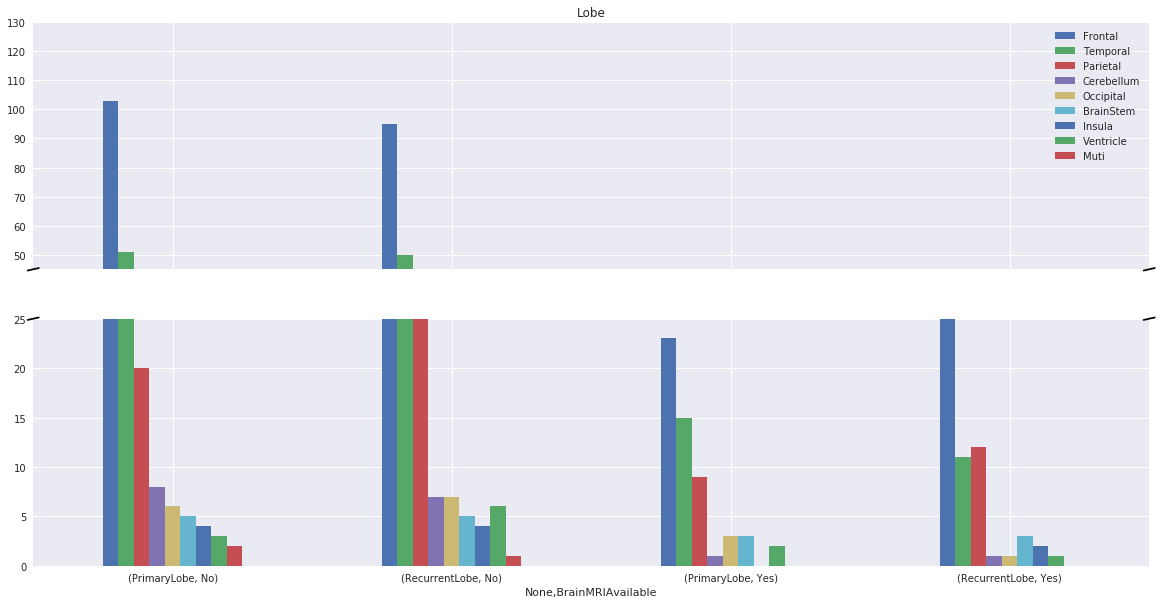

In [535]:
import matplotlib.pyplot as plt
PLobe_Count=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.P_Lobe)
RLobe_Count=pd.crosstab(index=Patient_Information_all_Finial.BrainMRIAvailable,columns=Patient_Information_all_Finial.R_Lobe)
Lobe=pd.concat([PLobe_Count,RLobe_Count],keys=['PrimaryLobe','RecurrentLobe']).sort_index(level=1, axis=0)
Lobe_Long=Lobe.T.sort_values(('PrimaryLobe','No'),ascending=False)
Lobe_Wide=Lobe_Long.T

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
Lobe_Long.plot(kind="bar",
                   figsize=(20,10),
                   title='Lobe',
                   ax=ax)
Lobe_Long.plot(kind="bar",rot=0,
                   figsize=(20,10),
                   ax=ax2)

ax.set_ylim(45, 130)  # outliers only
ax2.set_ylim(0, 30)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.legend().set_visible(False)# remove the legend on the top
ax2.xaxis.tick_bottom()
d = .005
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)
ax.plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)

#######################
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
Lobe_Wide.plot(kind="bar",
                   figsize=(20,10),
                   title='Lobe',
                   ax=ax)
Lobe_Wide.plot(kind="bar",rot=0,
                   figsize=(20,10),
                   ax=ax2)

ax.set_ylim(45, 130)  # outliers only
ax2.set_ylim(0, 25)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.legend().set_visible(False)# remove the legend on the top
ax2.xaxis.tick_bottom()
d = .005
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)
ax.plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)

plt.show()

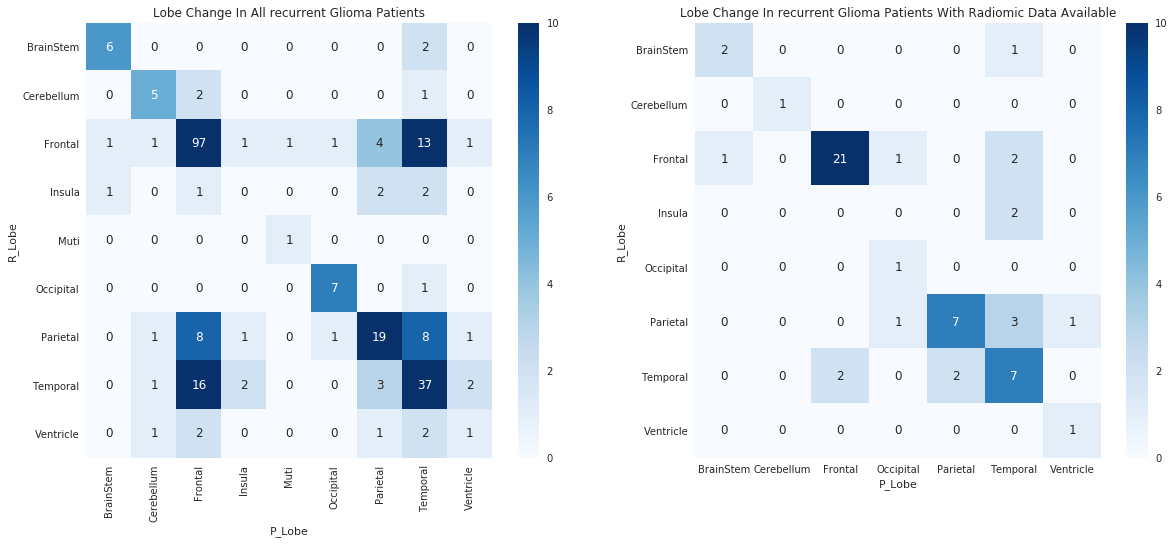

In [536]:
# raw code from https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
# Thank you Brideau
import numpy as np 
from pandas import DataFrame
import seaborn as sns

LobeChange=pd.crosstab(Patient_Information_all_Finial.R_Lobe,Patient_Information_all_Finial.P_Lobe)
fig, (ax,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(20,8)) # add a plotting area
sns.heatmap(LobeChange, annot=True,vmin=0, vmax=10,cmap="Blues",ax=ax)
ax.set_title('Lobe Change In All recurrent Glioma Patients')
LobeChange_HaveMRI=pd.crosstab(Patient_Information_all_Finial[Patient_Information_all_Finial.BrainMRIAvailable=='Yes'].R_Lobe,Patient_Information_all_Finial[Patient_Information_all_Finial.BrainMRIAvailable=='Yes'].P_Lobe)

sns.heatmap(LobeChange_HaveMRI, annot=True,vmin=0, vmax=10,cmap="Blues",ax=ax1)
ax1.set_title('Lobe Change In recurrent Glioma Patients With Radiomic Data Available')

plt.show()



In [537]:
#Pearson's chi-squared test
st=[]
p=[]
for i in LobeChange.index:
    
    a= scipy.stats.chisquare(LobeChange.loc[i,~LobeChange.columns.isin([i])])
    st.append(a.statistic)
    p.append(a.pvalue)

LobeChange["Test Statistic"]=st
LobeChange['p-value']=p
LobeChange['p<0.05']=[i<0.05 for i in LobeChange['p-value']]
LobeChange

P_Lobe,BrainStem,Cerebellum,Frontal,Insula,Muti,Occipital,Parietal,Temporal,Ventricle,Test Statistic,p-value,p<0.05
R_Lobe,,,,,,,,,,,,
BrainStem,6,0,0,0,0,0,0,2,0,14.000000,5.118135e-02,False
Cerebellum,0,5,2,0,0,0,0,1,0,10.333333,1.704575e-01,False
Frontal,1,1,97,1,1,1,4,13,1,43.434783,2.748997e-07,True
Insula,1,0,1,0,0,0,2,2,0,7.333333,3.950175e-01,False
Muti,0,0,0,0,1,0,0,0,0,NaN,NaN,False
Occipital,0,0,0,0,0,7,0,1,0,7.000000,4.288799e-01,False
Parietal,0,1,8,1,0,1,19,8,1,32.800000,2.884685e-05,True
Temporal,0,1,16,2,0,0,3,37,2,67.333333,5.100819e-12,True
Ventricle,0,1,2,0,0,0,1,2,1,7.333333,3.950175e-01,False


In [541]:
LobeChange.to_excel('./LobeChange.xlsx')

# Pathology and grade change
### which kind of Glioma most likely change Grade when recurrent
the relation between primary patholoy and Grade change

In [327]:
Patient_Information_all_Finial.columns

Index([                      u'MRN',                 u'PatientID',
                             u'Age',                    u'Gender',
                              u'PG',                     u'PPath',
                     u'PG_Category',                        u'RG',
                           u'RPath',               u'RG_Category',
       u'Recurrent_pathlogy_change',                      u'GFAP',
                            u'Ki67',                       u'P53',
                            u'MGMT',                     u'Olig2',
                            u'IDH1',                       u'EMA',
                            u'NeuN',                    u'GFAP_R',
                          u'Ki67_R',                     u'P53_R',
                          u'MGMT_R',                   u'Olig2_R',
                          u'IDH1_R',                     u'EMA_R',
                          u'NeuN_R',       u'First_operating_day',
         u'Recurrent-detecting_day',                    u'P_Si

In [357]:
Patient_Information_all_Finial['PG_Change']=None

In [361]:
for p,r,ID in zip(Patient_Information_all_Finial.PG,Patient_Information_all_Finial.RG,Patient_Information_all_Finial.index):
    if r!=None:
        if p!=r:
            Patient_Information_all_Finial.loc[ID,'PG_Change']=True
        else:
            Patient_Information_all_Finial.loc[ID,'PG_Change']=False

In [355]:
PathChange.columns

Index([False, True], dtype='object', name=u'Pathology Grade Change')

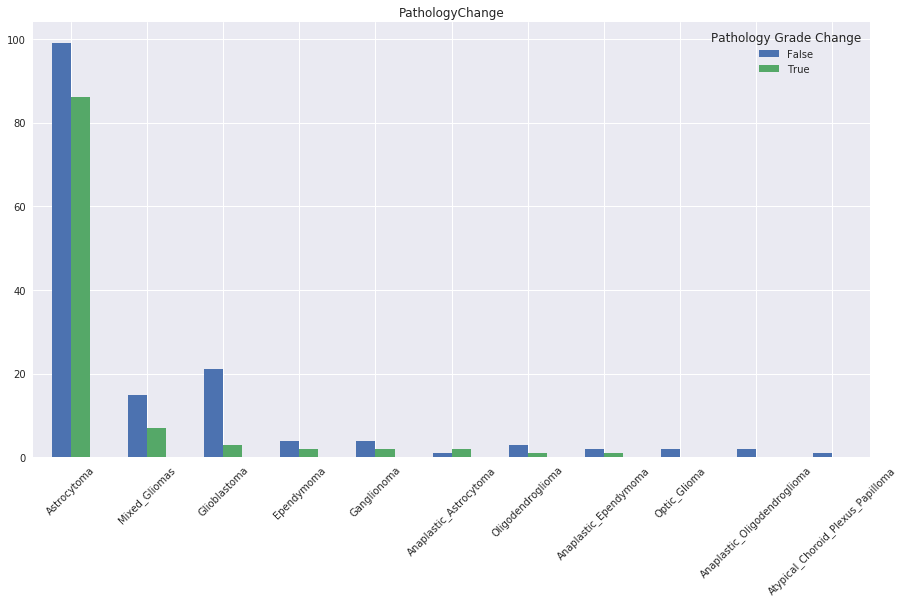

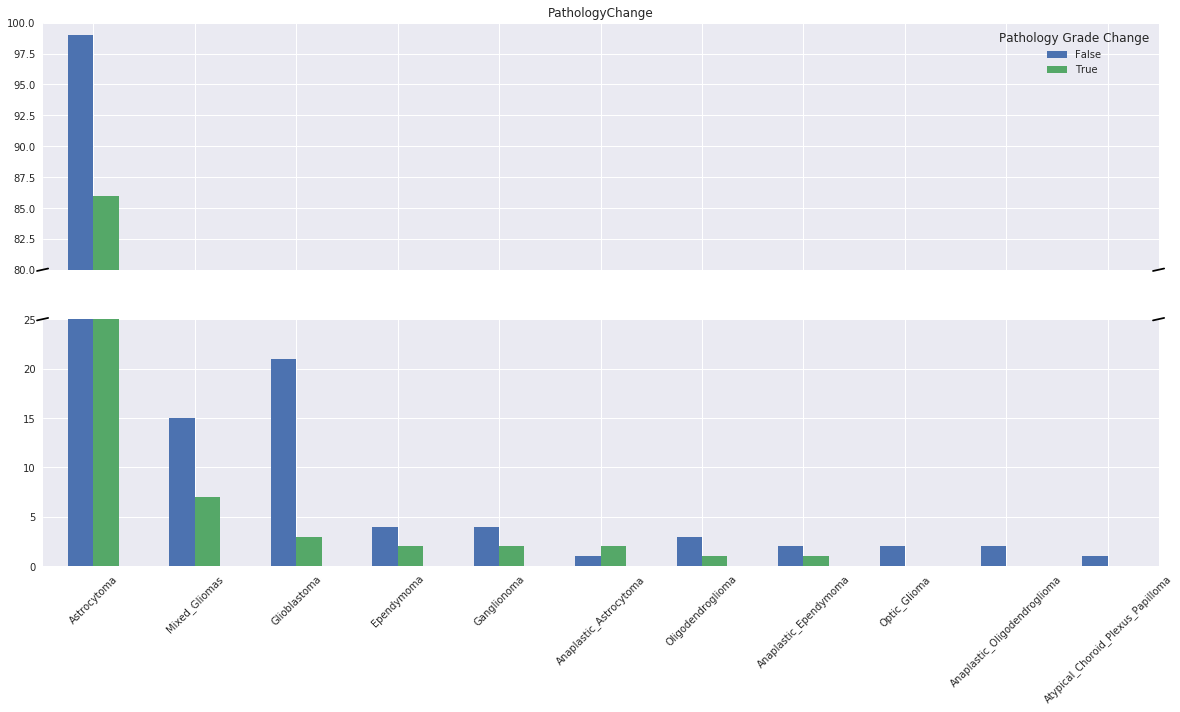

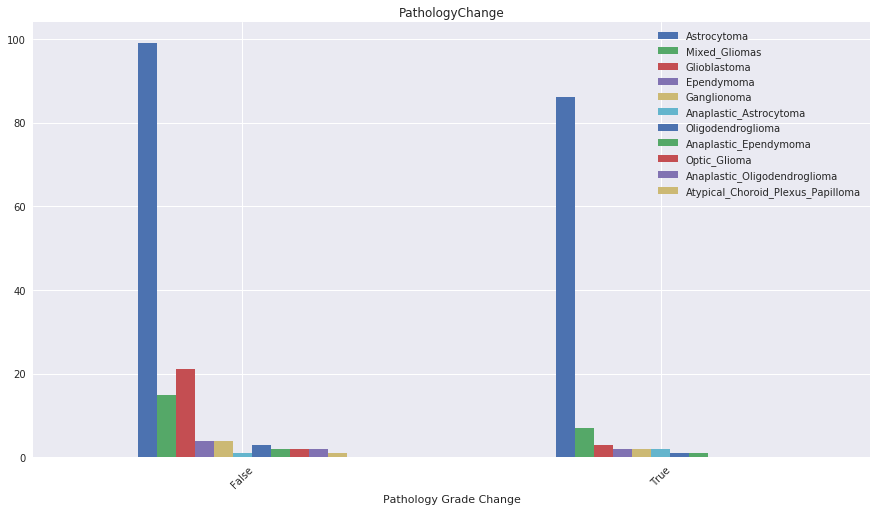

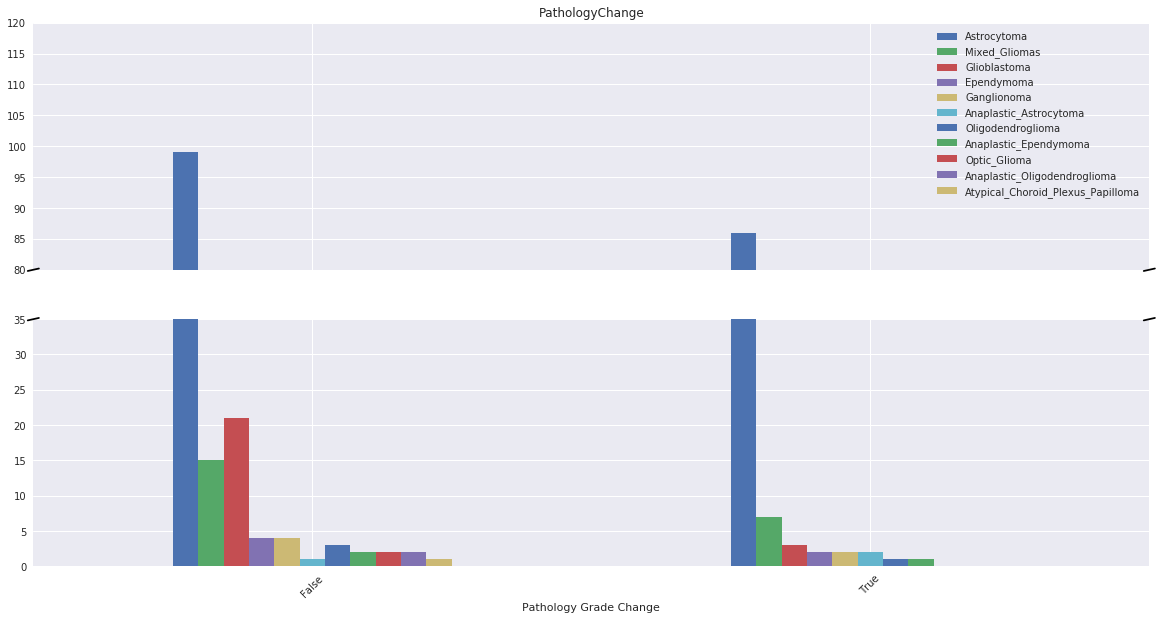

In [547]:
PathChange=pd.crosstab(index=Patient_Information_all_Finial.PPath,columns=Patient_Information_all_Finial.PG_Change).sort_values(True,ascending=False)

PathChange.columns.name='Pathology Grade Change'


New_name=[]
for i in PathChange.index:
    a=PathName.loc[PathName.Old_Group==i,'English']
#     print list(a)[0]
    New_name.append(list(a)[0])
# New_name
PathChange.index=New_name
PathChange.plot(kind="bar",rot=45,
                 figsize=(15,8),
                 title='PathologyChange')

#################break version
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
PathChange.plot(kind="bar",rot=45,
                   figsize=(20,10),
                   title='PathologyChange',
                   ax=ax)
PathChange.plot(kind="bar",rot=45,
                   figsize=(20,10),
                   ax=ax2)

ax.set_ylim(80, 100)  # outliers only
ax2.set_ylim(0, 25)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.legend().set_visible(False)# remove the legend on the top
ax2.xaxis.tick_bottom()
d = .005
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)
ax.plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)

###############
PathChange.T.plot(kind="bar",rot=45,
                 figsize=(15,8),
                 title='PathologyChange')

#################break version
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
PathChange.T.plot(kind="bar",rot=45,
                   figsize=(20,10),
                   title='PathologyChange',
                   ax=ax)
PathChange.T.plot(kind="bar",rot=45,
                   figsize=(20,10),
                   ax=ax2)

ax.set_ylim(80, 120)  # outliers only
ax2.set_ylim(0, 35)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.legend().set_visible(False)# remove the legend on the top
ax2.xaxis.tick_bottom()
d = .005
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)
ax.plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)

plt.show()

In [370]:
list(PathChange[True])

[86, 7, 3, 2, 2, 2, 1, 1, 0, 0, 0]

In [376]:
# statistic use Pearson's chi-squared test
# idea came from https://stats.stackexchange.com/questions/108007/correlations-with-unordered-categorical-variables
# thank you gung♦
# raw code from http://connor-johnson.com/2014/12/31/the-pearson-chi-squared-test-with-python-and-r/
#Thank you hamelg

import scipy.stats

 
chi2, p = scipy.stats.chisquare( list(PathChange[True]) )
msg = "PathChanged\nTest Statistic: {}\np-value: {}"
 
print( msg.format( chi2, p ) )
print ('p<0.05 '+str(p<0.05))
print '~'*10
chi2, p = scipy.stats.chisquare( list(PathChange[False]) )
msg = "PathNotChanged\nTest Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )
print ('p<0.05 '+str(p<0.05))

PathChanged
Test Statistic: 685.884615385
p-value: 6.72669028913e-141
p<0.05 True
~~~~~~~~~~
PathNotChanged
Test Statistic: 597.571428571
p-value: 5.83545372478e-122
p<0.05 True


In [543]:
import scipy.stats
PathChange_signal=PathChange.T
st,p= scipy.stats.chisquare(PathChange_signal)
PathChange["Test Statistic"]=st
PathChange['p-Value']=p


In [544]:
PathChange

Pathology Grade Change,False,True,Test Statistic,p-Value
Astrocytoma,99,86,0.913514,0.339184
Mixed_Gliomas,15,7,2.909091,0.088082
Glioblastoma,21,3,13.500000,0.000239
Ependymoma,4,2,0.666667,0.414216
Ganglionoma,4,2,0.666667,0.414216
Anaplastic_Astrocytoma,1,2,0.333333,0.563703
Oligodendroglioma,3,1,1.000000,0.317311
Anaplastic_Ependymoma,2,1,0.333333,0.563703
Optic_Glioma,2,0,2.000000,0.157299
Anaplastic_Oligodendroglioma,2,0,2.000000,0.157299


In [545]:
PathChange.to_excel('./PathGradeChange.xlsx')

#### conclusion: if Primary Pathology is different the rate of recurrent tumor grade change is different;Glioblastoma when recurrent the tumor grade will not change(p<0.05)
